In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/drive/My Drive")
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
/content/drive/My Drive


In [2]:
#Carga y muestra del dataset
automobile_df = pd.read_csv("/content/auto-mpg.csv", sep = ",")
# Ver 5 registros aleatorios
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
133,16.0,6,250.0,100,3781,17.0,74,1,chevrolet chevelle malibu classic
15,22.0,6,198.0,95,2833,15.5,70,1,plymouth duster
192,22.0,6,250.0,105,3353,14.5,76,1,chevrolet nova
382,34.0,4,108.0,70,2245,16.9,82,3,toyota corolla
160,17.0,6,231.0,110,3907,21.0,75,1,buick century


In [3]:
#Tamaño del dataset
automobile_df.shape

(398, 9)

In [4]:
#Info
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
#Preparacion de datos
automobile_df = automobile_df.replace('?', np.nan)
automobile_df = automobile_df.dropna()
automobile_df.shape

(392, 9)

In [6]:
#Eliminamos columnas inncesarias
automobile_df.drop(['origin', 'car name'], axis=1, inplace=True)#origen y el nombre datos irrelvantes

In [7]:
#Vemos registros aleatorios
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
114,26.0,4,98.0,90,2265,15.5,73
85,13.0,8,350.0,175,4100,13.0,73
362,24.2,6,146.0,120,2930,13.8,81
249,19.9,8,260.0,110,3365,15.5,78
200,18.0,6,250.0,78,3574,21.0,76


In [8]:
#Info
automobile_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 24.5+ KB


In [9]:
#Convertimos el formato de ‘model year’ a año completo
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)

In [12]:
#Vemos los datos
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
328,30.0,4,146.0,67,3250,21.8,1980,44
137,13.0,8,350.0,150,4699,14.5,1974,50
386,25.0,6,181.0,110,2945,16.4,1982,42
182,28.0,4,107.0,86,2464,15.5,1976,48
300,23.9,8,260.0,90,3420,22.2,1979,45


In [11]:
#Agregamos la columna age
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [13]:
#Eliminamos model year
automobile_df.drop(['model year'], axis=1, inplace=True)

In [14]:
#Corroboramos que todo este bien
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
349,34.1,4,91.0,68,1985,16.0,43
232,16.0,8,351.0,149,4335,14.5,47
78,21.0,4,120.0,87,2979,19.5,52
392,27.0,4,151.0,90,2950,17.3,42
258,20.6,6,231.0,105,3380,15.8,46


In [15]:
#Vemos los tipos de datos
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [16]:
#Convertimos horsepower en numerico
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'], errors='coerce')

In [17]:
#Analisis estadistico de datos
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,48.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,42.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,45.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,48.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,51.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,54.000000


Text(0, 0.5, 'Millas por galon')

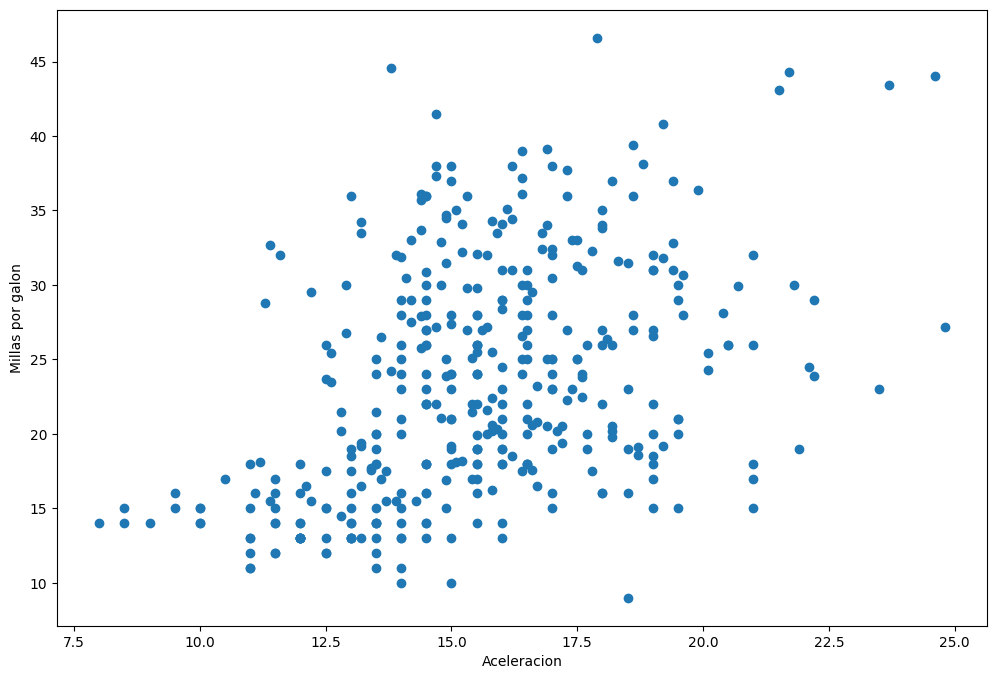

In [18]:
#Veamos algunos plots!
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])

plt.xlabel('Aceleracion')
plt.ylabel('Millas por galon')

Text(0, 0.5, 'Millas por galon')

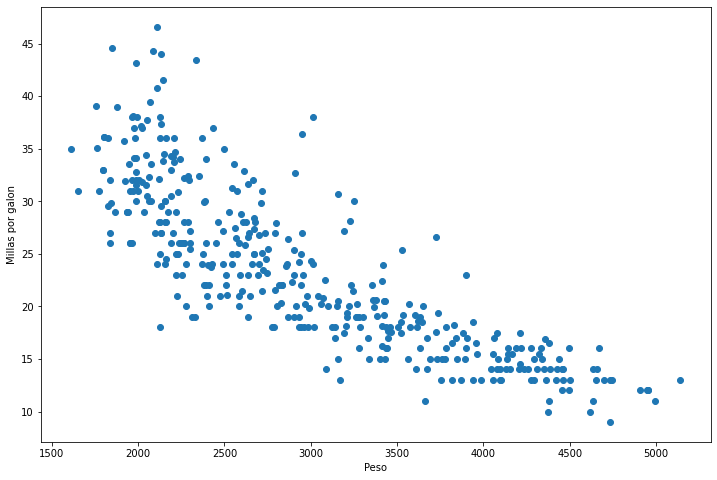

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['weight'], automobile_df['mpg'])

plt.xlabel('Peso')
plt.ylabel('Millas por galon')

Text(0, 0.5, 'Millas por galon')

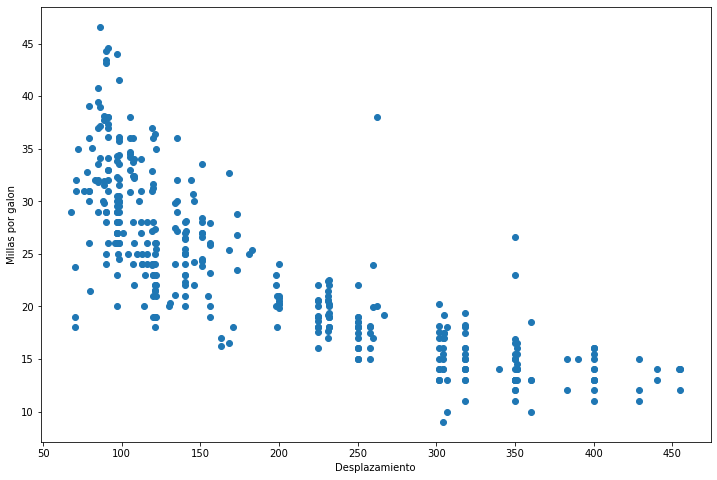

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['displacement'], automobile_df['mpg'])

plt.xlabel('Desplazamiento')
plt.ylabel('Millas por galon')

Text(0, 0.5, 'Millas por galon')

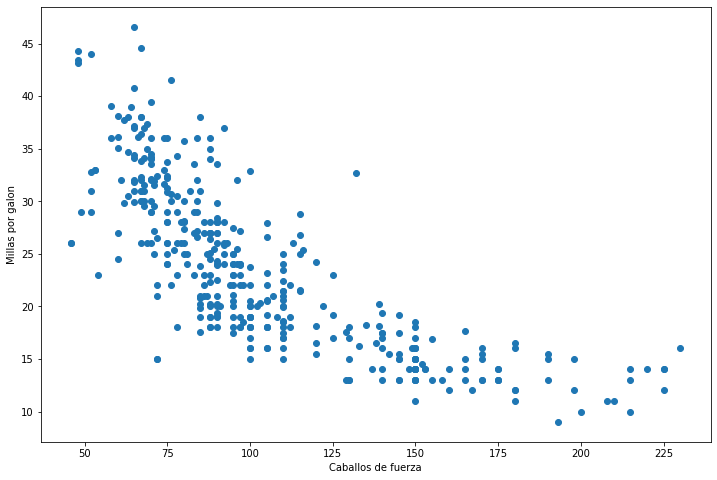

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])

plt.xlabel('Caballos de fuerza')
plt.ylabel('Millas por galon')

In [19]:
#Analisis de Correlaciones
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<Axes: >

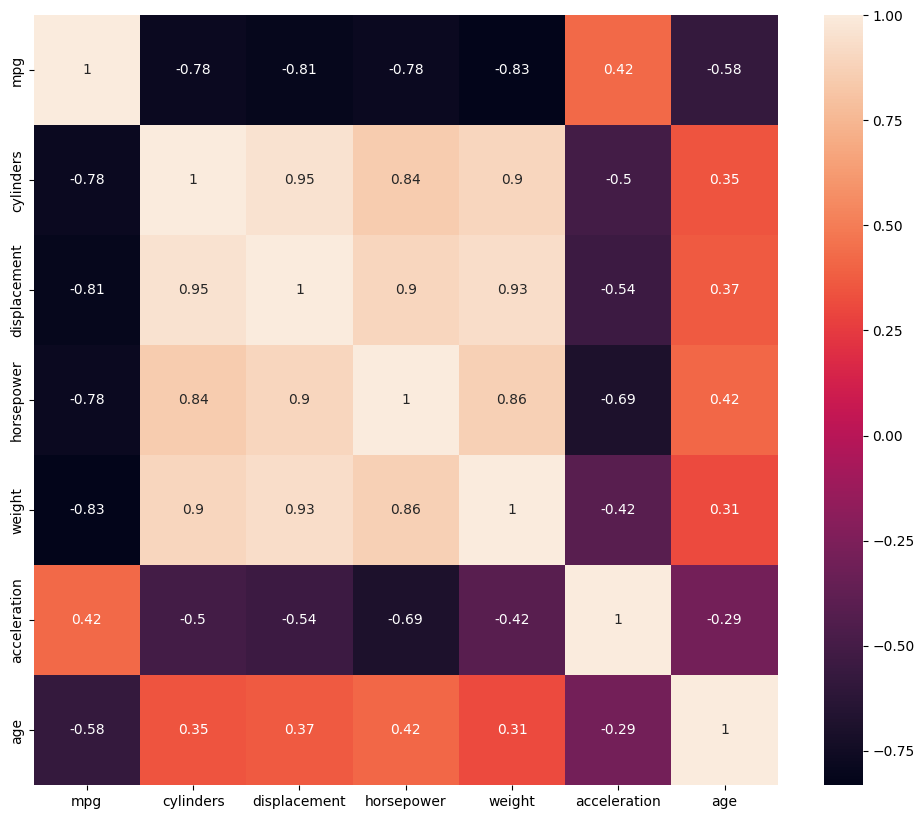

In [20]:
#Matriz de correlacion
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(automobile_corr, annot=True)

In [21]:
#Regresion Lineal
from sklearn.model_selection import train_test_split
#PCA, selectKbest, FA, SFS, BFS
X = automobile_df[['horsepower']]
Y = automobile_df['mpg']

#Train y Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [23]:
#Importamos, creamos y fiteamos el modelo
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(x_train, y_train)

In [24]:
print('Puntaje Entrenamiento: ', linear_model.score(x_train, y_train))

Puntaje Entrenamiento:  0.625753353972424


In [25]:
#Realizamos las predicciones
y_pred = linear_model.predict(x_test)

In [26]:
from sklearn.metrics import r2_score

print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  0.5378687374431472


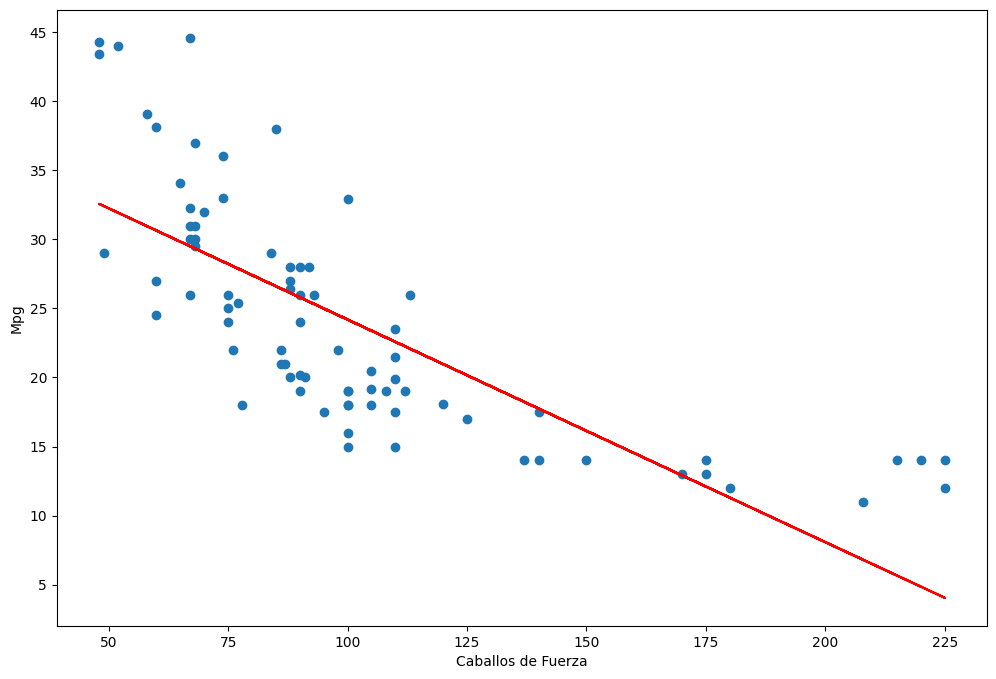

In [27]:
#Ploteamos
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Caballos de Fuerza')
plt.ylabel('Mpg')
plt.show()

In [29]:
#Regresion lineal con age
X = automobile_df[['age']]#age
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

linear_model = LinearRegression().fit(x_train, y_train)

print('Puntaje de entrenamiento: ', linear_model.score(x_train, y_train))

y_pred = linear_model.predict(x_test)

print('Puntaje de Testing: ', r2_score(y_test, y_pred))

Puntaje de entrenamiento:  0.35202984386259006
Puntaje de Testing:  0.2525697110002423


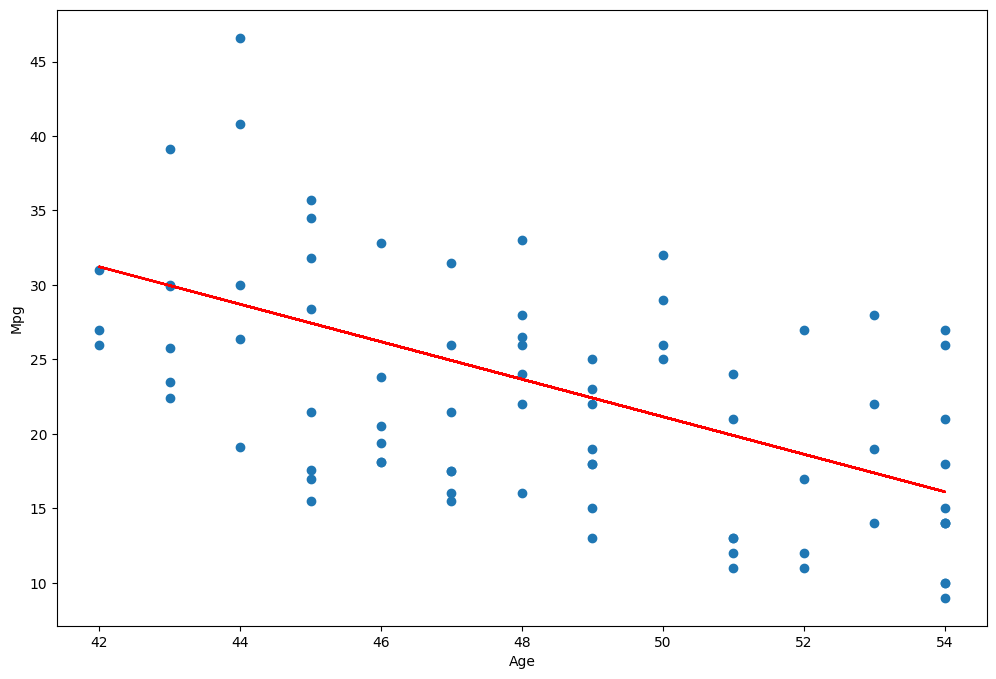

In [30]:
#Ploteamos
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.xlabel('Age')
plt.ylabel('Mpg')
plt.show()

In [31]:
#Regresion lineal con varias caracteristicas
X = automobile_df[['displacement', 'horsepower', 'weight']]
Y = automobile_df['mpg']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [32]:
#Creamos el modelo
linear_model = LinearRegression().fit(x_train, y_train)

In [33]:
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.7084964203940485


In [34]:
#Coeficientes
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

horsepower     -0.041170
weight         -0.005644
displacement   -0.004010
dtype: float64


In [35]:
#Realizamos las predicciones
y_pred = linear_model.predict(x_test)

In [36]:
print('Puntaje Testing', r2_score(y_test, y_pred))#70% agregando mas variables

Puntaje Testing 0.6967301841187621


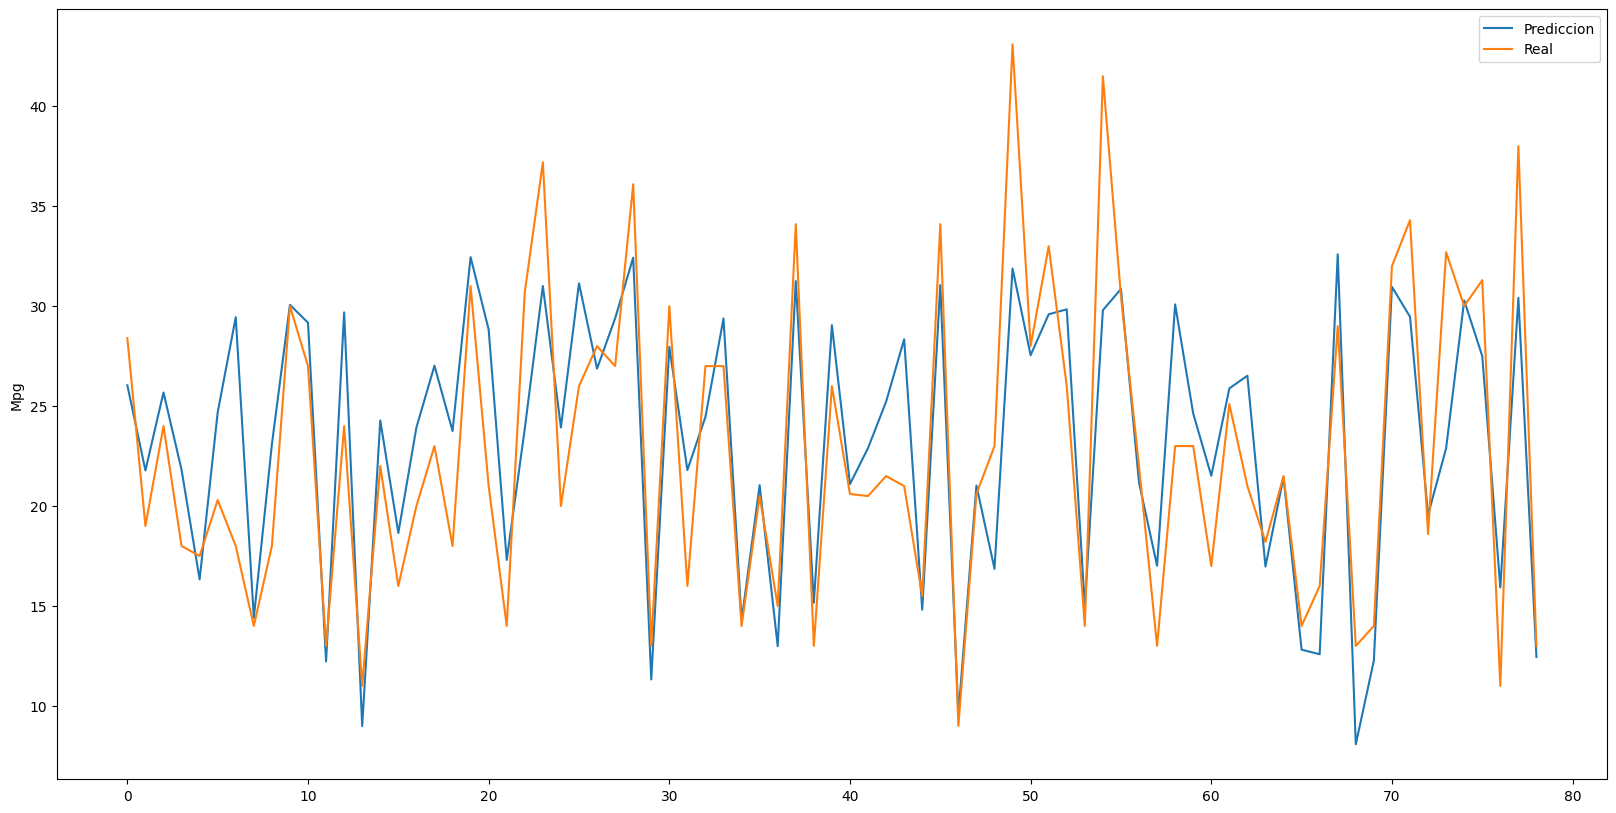

In [37]:
#Ploteamos
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Prediccion')
plt.plot(y_test.values, label='Real')

plt.ylabel('Mpg')

plt.legend()
plt.show()

In [38]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.29981868899825
Mean Squared Error: 18.149861220609434
Root Mean Squared Error: 4.260265393213131
